In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
%matplotlib inline

In [4]:
df=pd.read_csv("logistic_reg_fraud_detection.csv",nrows=5000)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.010689,0.114032,0.113047,0.107911,0.064087,0.035032,NaN
amount,0.010689,1.000000,0.148712,0.090107,0.289913,0.359588,0.228089,NaN
oldbalanceOrg,0.114032,0.148712,1.000000,0.994945,0.270225,0.220570,-0.004595,NaN
newbalanceOrig,0.113047,0.090107,0.994945,1.000000,0.278614,0.222751,-0.037979,NaN
oldbalanceDest,0.107911,0.289913,0.270225,0.278614,1.000000,0.914239,-0.028900,NaN
newbalanceDest,0.064087,0.359588,0.220570,0.222751,0.914239,1.000000,-0.008243,NaN
isFraud,0.035032,0.228089,-0.004595,-0.037979,-0.028900,-0.008243,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.step.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5000 non-null   int64  
 1   type            5000 non-null   object 
 2   amount          5000 non-null   float64
 3   nameOrig        5000 non-null   object 
 4   oldbalanceOrg   5000 non-null   float64
 5   newbalanceOrig  5000 non-null   float64
 6   nameDest        5000 non-null   object 
 7   oldbalanceDest  5000 non-null   float64
 8   newbalanceDest  5000 non-null   float64
 9   isFraud         5000 non-null   int64  
 10  isFlaggedFraud  5000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


In [11]:
df.isna().sum().sum()

0

In [12]:
df1=df.drop(['nameOrig','nameDest'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_6520/2716074544.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1=df.drop(['nameOrig','nameDest'],'columns')


In [13]:
df1.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [14]:
df1.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
df1.groupby('type')['type'].count()

type
CASH_IN     1082
CASH_OUT     631
DEBIT        263
PAYMENT     2587
TRANSFER     437
Name: type, dtype: int64

In [16]:
#sns.pairplot(df1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


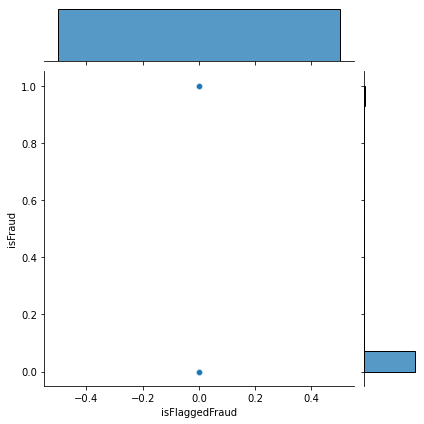

In [17]:
sns.jointplot(df1.isFlaggedFraud,df1.isFraud)

In [18]:
#type

In [19]:
type_dummy=pd.get_dummies(df1['type'],'columns',drop_first=True)

In [20]:
type_dummy[:2]

,columns_CASH_OUT,columns_DEBIT,columns_PAYMENT,columns_TRANSFER
0,0,0,1,0
1,0,0,1,0


In [26]:
#type_dummy=type_dummy.drop('columns_TRANSFER','columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_9592/3633466118.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  type_dummy=type_dummy.drop('columns_TRANSFER','columns')


In [21]:
df2=pd.concat([df1,type_dummy],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_6520/4094760304.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df2=pd.concat([df1,type_dummy],'columns')


In [22]:
df2=df2.drop('type','columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_6520/3638006154.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=df2.drop('type','columns')


In [23]:
df2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,columns_CASH_OUT,columns_DEBIT,columns_PAYMENT,columns_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [24]:
X=df2.drop('isFraud','columns')
y=df2.isFraud

C:\Users\Admin\AppData\Local\Temp/ipykernel_6520/2845202129.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df2.drop('isFraud','columns')


In [25]:
X.ndim,y.ndim

(2, 1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=50)

In [28]:
X_train.shape

(4000, 11)

In [31]:
pipeline_lr=Pipeline([('scalar1', StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

pipeline_svc=Pipeline([('scalar2', StandardScaler()),
                      ('pca2',PCA(n_components=2)),
                      ('svc_classifier',SVC())])

pipeline_dtree=Pipeline([('scalar3', StandardScaler()),
                      ('pca3',PCA(n_components=2)),
                      ('dtree_classifier',DecisionTreeClassifier())])

pipeline_random=Pipeline([('scalar4', StandardScaler()),
                      ('pca4',PCA(n_components=2)),
                      ('random_classifier',RandomForestClassifier())])

In [32]:
pipelines=[pipeline_lr,pipeline_svc,pipeline_dtree,pipeline_random]

In [33]:
pipe_dict={0:'Logistic Regression',1:'SVC',2:'Decision Tree',3:'Random Forest'}

for i in pipelines:
    i.fit(X_train,y_train)

In [41]:
for i,model in enumerate(pipelines):
    print('{} model accuracy : {}'.format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression model accuracy : 0.991
SVC model accuracy : 0.991
Decision Tree model accuracy : 0.986
Random Forest model accuracy : 0.991
